<a href="https://colab.research.google.com/github/git-dibwar/DataScienceAndBusinessAnalytics/blob/main/Exploratory_data_analysis_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/git-dibwar/DataScienceAndBusinessAnalytics/main/data/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [17]:
#To check whether there are any null enteries in the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [19]:
#country and postal code are not necessary, so will drop the both the columns
df.drop(["Country", "Postal Code"], axis=1, inplace=True)

In [21]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Min Sales: 0.444, Max Sales: 22638.48 & Max Profit: 8399.976**

In [22]:
#Total Sales:
print('Total sales are {}'.format(df["Sales"].sum()))
#Total Profit:
print('Total profit is {}'.format(df["Profit"].sum()))


Total sales are 2297200.8603000003
Total profit is 286397.0217


In [23]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [25]:
df.shape

(9994, 11)

In [31]:
#finding the number of duplicate rows
df.duplicated().sum()

0

In [32]:
#Droping all the duplicate rows
df.drop_duplicates(inplace=True)

# **Analysing the Dataset**

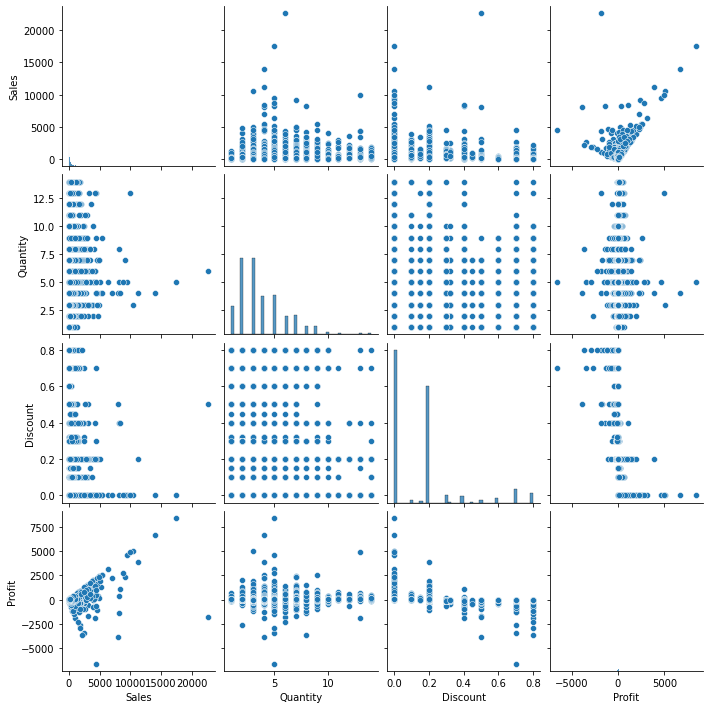

In [34]:
sns.pairplot(df)



1.   As Discount Increases, Profit Decreases
2.   As Discount Increases, Sales Decrease
3.   As Sales Increases, Profit Increases



In [35]:
#correlation functin
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


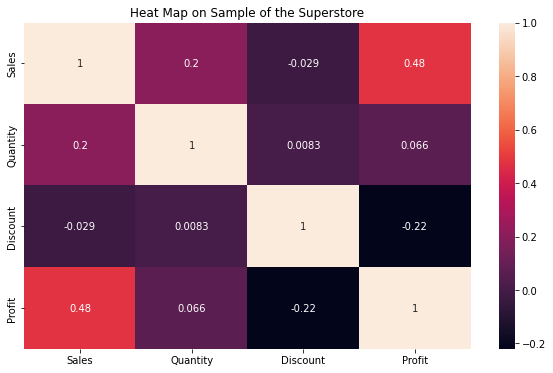

In [37]:
#Heat map over correlation funciton
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Heat Map on Sample of the Superstore')
plt.show()



1.   Most Correlation: Sales and Profit
2.   Least Correlatin: Discount and Quantity



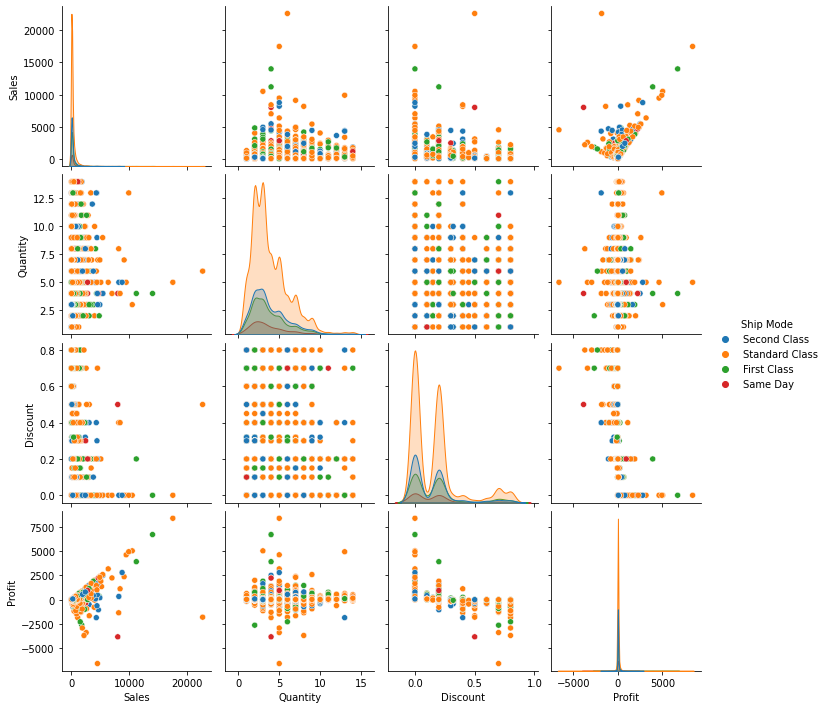

In [41]:
#pairplot relation between the 'shipping mode' and the Sales,Quantity,Discount & Profit
sns.pairplot(df,hue='Ship Mode')

Ship Mode 

In [42]:
df['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

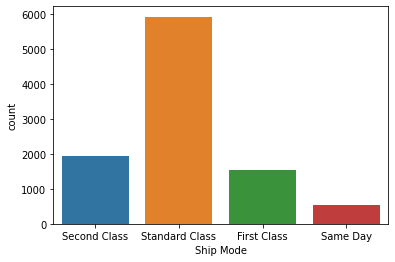

In [43]:
sns.countplot(x=df['Ship Mode'])



1.   Most opted Ship Mode: Standard Class
2.   Least opted Ship Mode: Same Day



In [46]:
ps=df.groupby('Ship Mode')[["Profit","Sales"]].sum()
ps

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


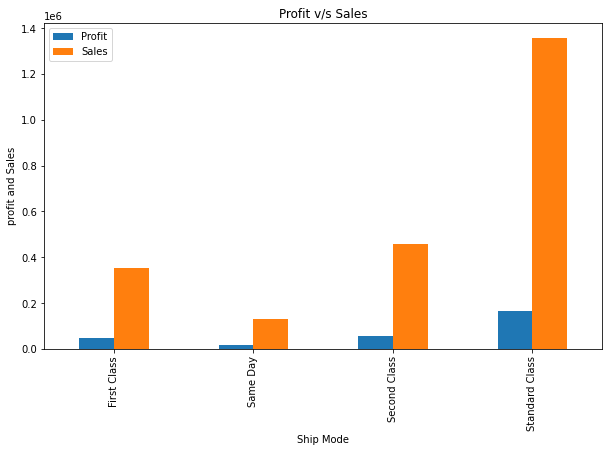

In [47]:
ps.plot(kind='bar',figsize=(10,6))
plt.title("Profit v/s Sales")
plt.ylabel("profit and Sales")
plt.show()



1.   maximum Profit and Sales: Standard Class
2.   Minimum Profit and Sales: Same Day



In [49]:
cat=df["Category"].value_counts()
cat

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

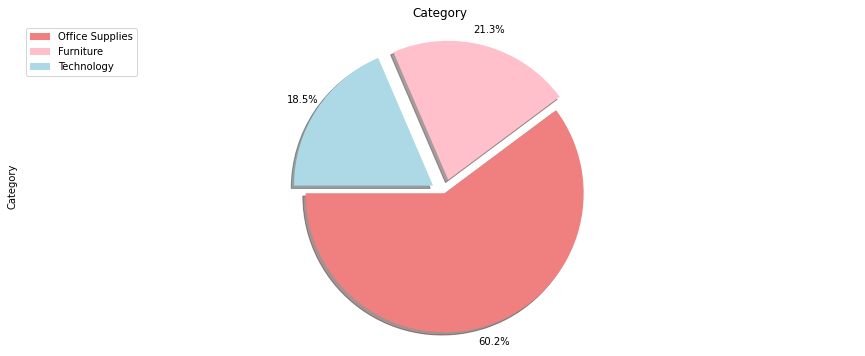

In [55]:
explode_list=[0,0.1,0.1]
colors_list=["lightcoral","pink","lightblue"]
cat.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True, startangle=180, 
                                   explode=explode_list, labels=None, pctdistance=1.12, colors=colors_list)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=cat.index,loc="upper left")
plt.show()

# **Sales and Profit for every Category**

In [56]:
#Category wise Sales
cs=df.groupby("Category").Sales.sum()
#Category wise Profit
cp=df.groupby("Category").Profit.sum()

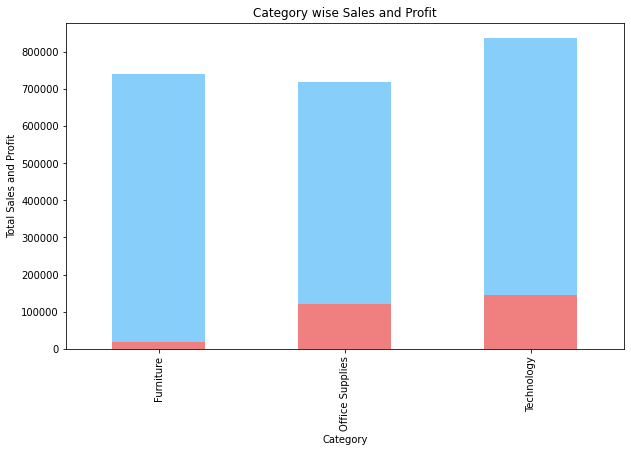

In [57]:
#Sales
ax0=cs.plot(kind="bar", figsize=(10,6), color="lightskyblue")

#Profit
ax0=cp.plot(kind="bar", figsize=(10,6), color="lightcoral")

ax0.set_title("Category wise Sales and Profit")
ax0.set_ylabel("Total Sales and Profit")

plt.show()


1. Maximum Profit and Sales in Category: Technology
2. Minimum Profit and Sales in Category: Office Supplies



**Sub Category**

In [58]:
sub=df["Sub-Category"].value_counts()
sub

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

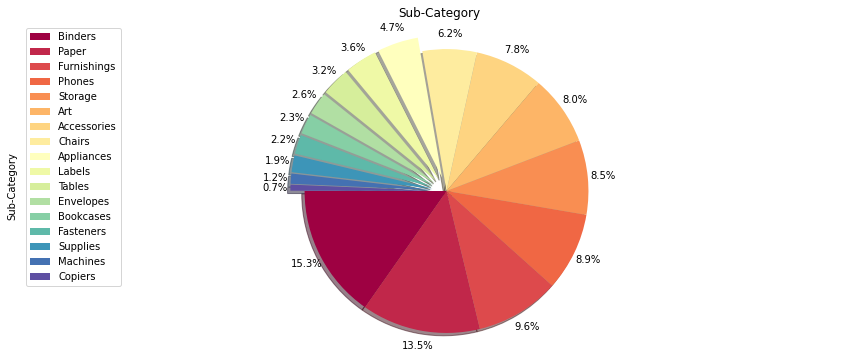

In [59]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sub.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True,startangle=180,
                                   explode=explode_list, labels=None, pctdistance=1.11,cmap=cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels=sub.index,loc="upper left")
plt.show()

**Category and Sub-Category**

In [60]:
x=df.groupby(["Category","Sub-Category"]).Sales.sum()
y=df.groupby(["Category","Sub-Category"]).Profit.sum()

**Sales**


1. Maximum Sales in : Phones(Technology), Chairs(Furniture) and Storage(Office Supplies)
2. Minimum Sales in : Fasteners, Labels and Envelopes (Office Supplies)

**Profit**

**Sales and Profit Combined**

Text(0, 0.5, 'Profit')

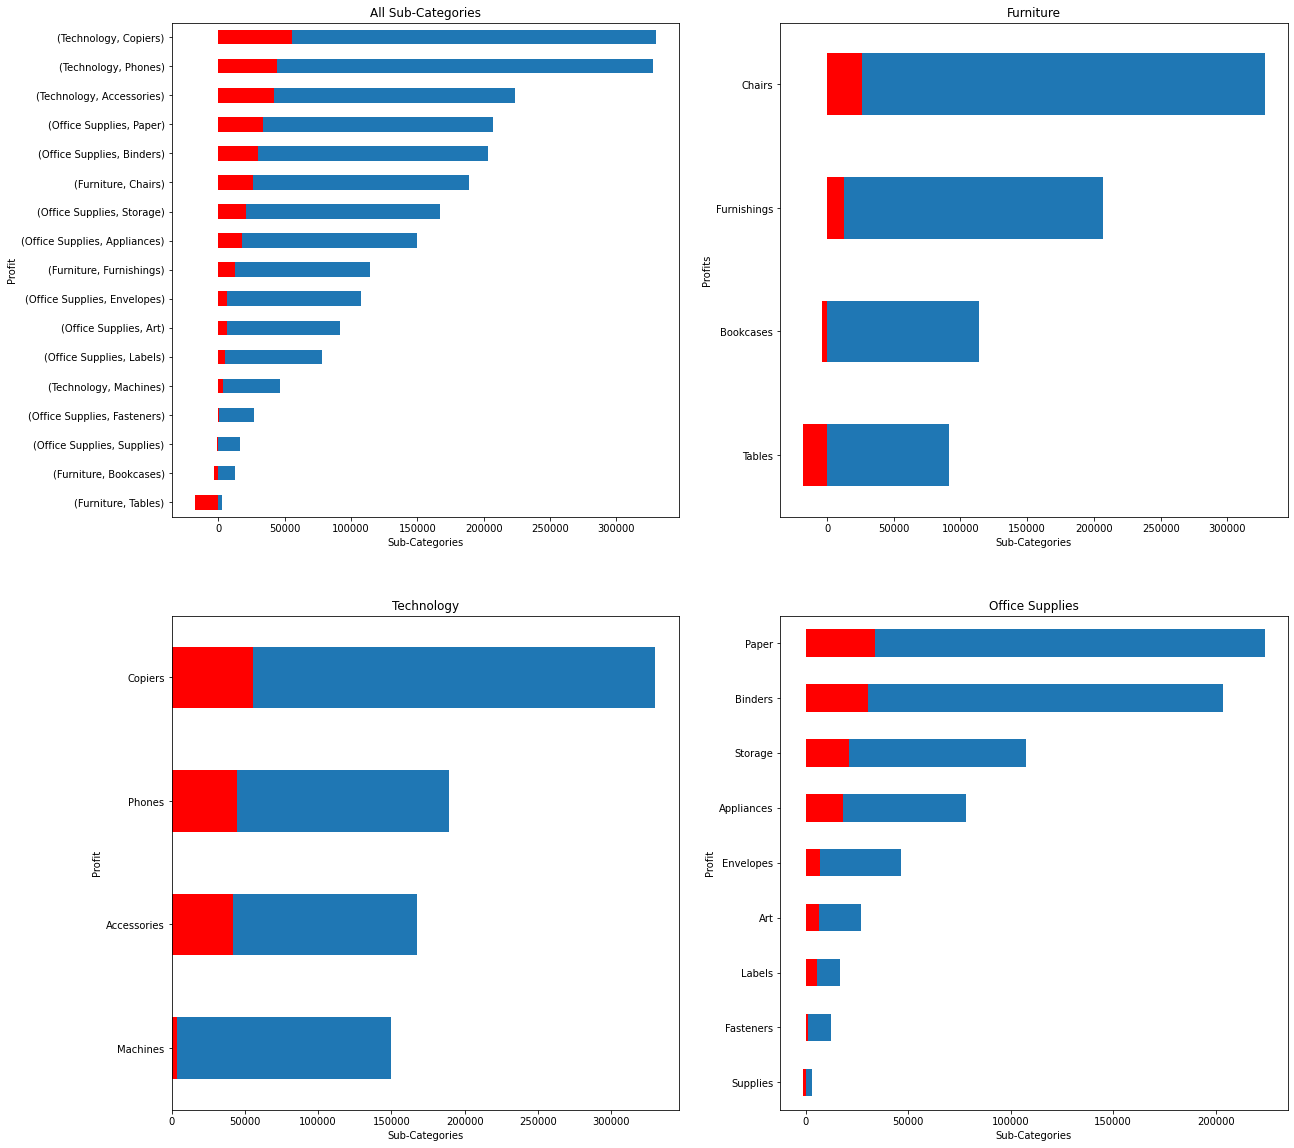

In [63]:
#Sales

fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

#Profit

#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="red")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="red")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="red")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="red")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

In [64]:
state=df["State"].value_counts()
state

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

Text(0, 0.5, 'Number of Buyers')

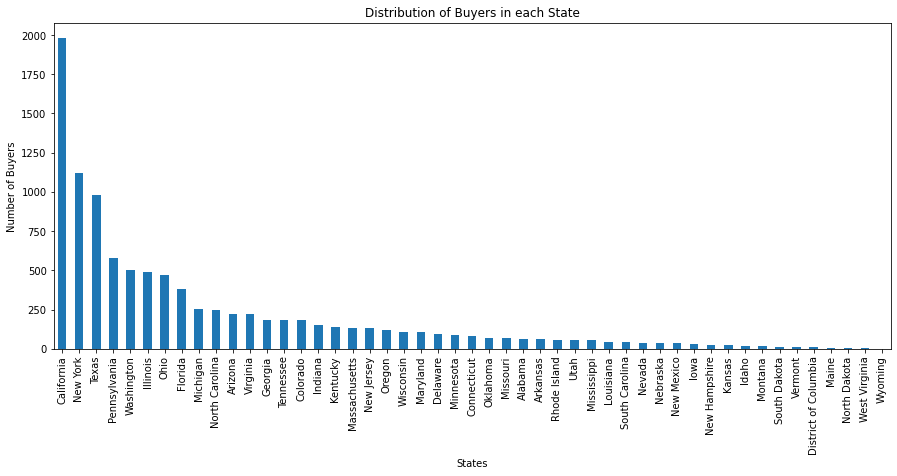

In [65]:
state.plot(kind="bar",figsize=(15,6))
plt.title("Distribution of Buyers in each State")
plt.xlabel("States")
plt.ylabel("Number of Buyers")



1. Most buyers belong to "California", "New York" and "Texas"
2. Least buyers belong to "Wyoming", "West Virginia" and "North Dakota"



In [66]:
ss=df.groupby(["State"]).Sales.sum()
sp=df.groupby(["State"]).Profit.sum()

Text(0, 0.5, 'Profit')

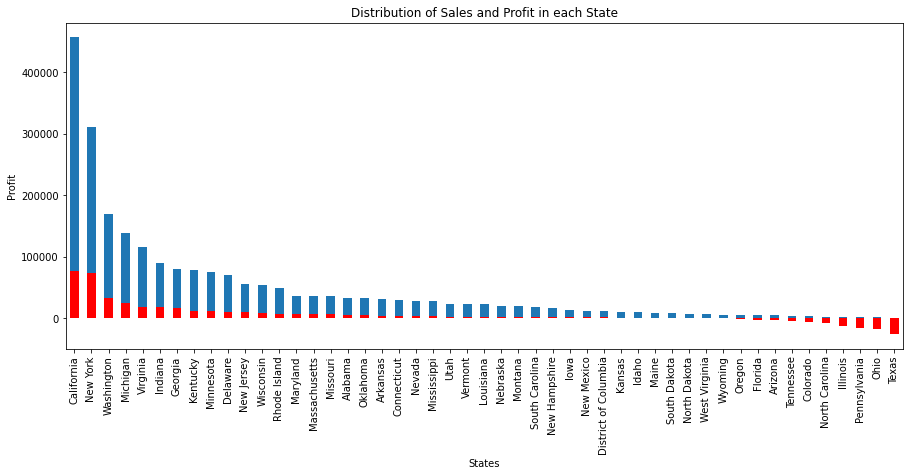

In [67]:
#State wise Distribution of Sales
ss.sort_values(ascending=False).plot(kind="bar",figsize=(15,6))
plt.xlabel("States")
plt.ylabel("Sales")

#State wise Distribution of Profit
sp.sort_values(ascending=False).sort_values(ascending=False).plot(kind="bar",figsize=(15,6),color="red")
plt.title("Distribution of Sales and Profit in each State")
plt.xlabel("States")
plt.ylabel("Profit")


1. Maximum Sales and Profit in cities: "California" and "New York"
2. Minimum Sales and Profit in cities: "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado", "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas"



**Sales and Profit in different segments**

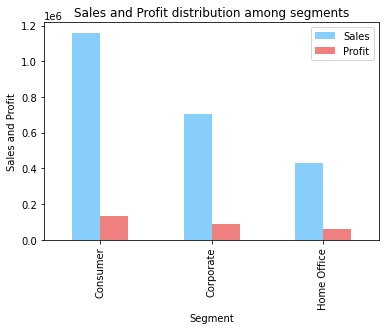

In [68]:
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind="bar",color=["lightskyblue","lightcoral"])
plt.ylabel("Sales and Profit")
plt.xlabel("Segment")
plt.title("Sales and Profit distribution among segments")
plt.show()

**Relation between Profit and Discount**

In [69]:
df["Discount"].corr(df["Profit"])

-0.21993898249765037

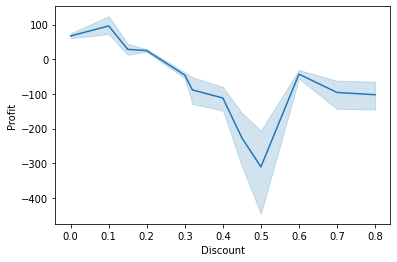

In [70]:
sns.lineplot(x="Discount",y="Profit",data=df)
plt.show()

**Relation among Sales, Profit and Discount**

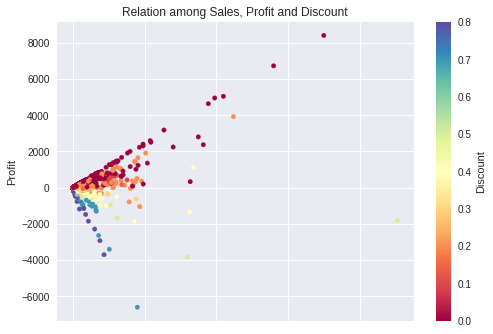

In [71]:

plt.style.use("seaborn")
df.plot(kind="scatter",x="Sales",y="Profit",c="Discount",colormap="Spectral")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relation among Sales, Profit and Discount")
plt.show()



1. As Discount increases Profit decreases
2. Discount and Sales have a lesser relation but Sales also decrease with increasing discount



**Conclusion**

1. Cut on discounts to increase Profit and Sales
2. Focus on Standard Class more as it brings most profit and sales
3. Move the major distribution of business towards Technology(most profitable) rather than Office Supplies(least profitable)
4. Under Technology more focus should be given over Copiers, Phones and Accessories which bring maximum profit
5. Work to uplift sales in cities that are facing losses such as "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado", "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas"
6. Keep focus over the cities with most buyers and most sales and profit, that are, "California" and "New york"
7. Consumer segment should be encouraged as it brings most sales and profit
8. Western and Eastern regions should be focussed upon for major chunk of sales and profit